<a href="https://colab.research.google.com/github/Ashish-sinh/Heart-Attack-predictor/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# make new root directory and paste the kaggle.json file there :

!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle

In [ ]:
# download data set :
!chmod 600 /root/.kaggle/kaggle.json # for make secure the kaggle.json file
!kaggle datasets download -d bharath011/heart-disease-classification-dataset


  0% 0.00/15.8k [00:00<?, ?B/s]
100% 15.8k/15.8k [00:00<00:00, 2.95MB/s]


In [ ]:
# extract the file :

import zipfile
zip_ref = zipfile.ZipFile('/content/heart-disease-classification-dataset.zip')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('Heart Attack.csv')
df.head(3)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative


# some preprocessing

In [ ]:
# drop nan rows and encode the datat :
df.dropna(inplace = True)
df['class']= df['class'].apply(lambda x : 1 if x == 'positive' else 0 )
df.head(2)

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.9 KB


In [ ]:
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942,0.614102
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568,0.486991
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,0.000000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000,0.000000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,1.000000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500,1.000000
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1.000000


In [ ]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

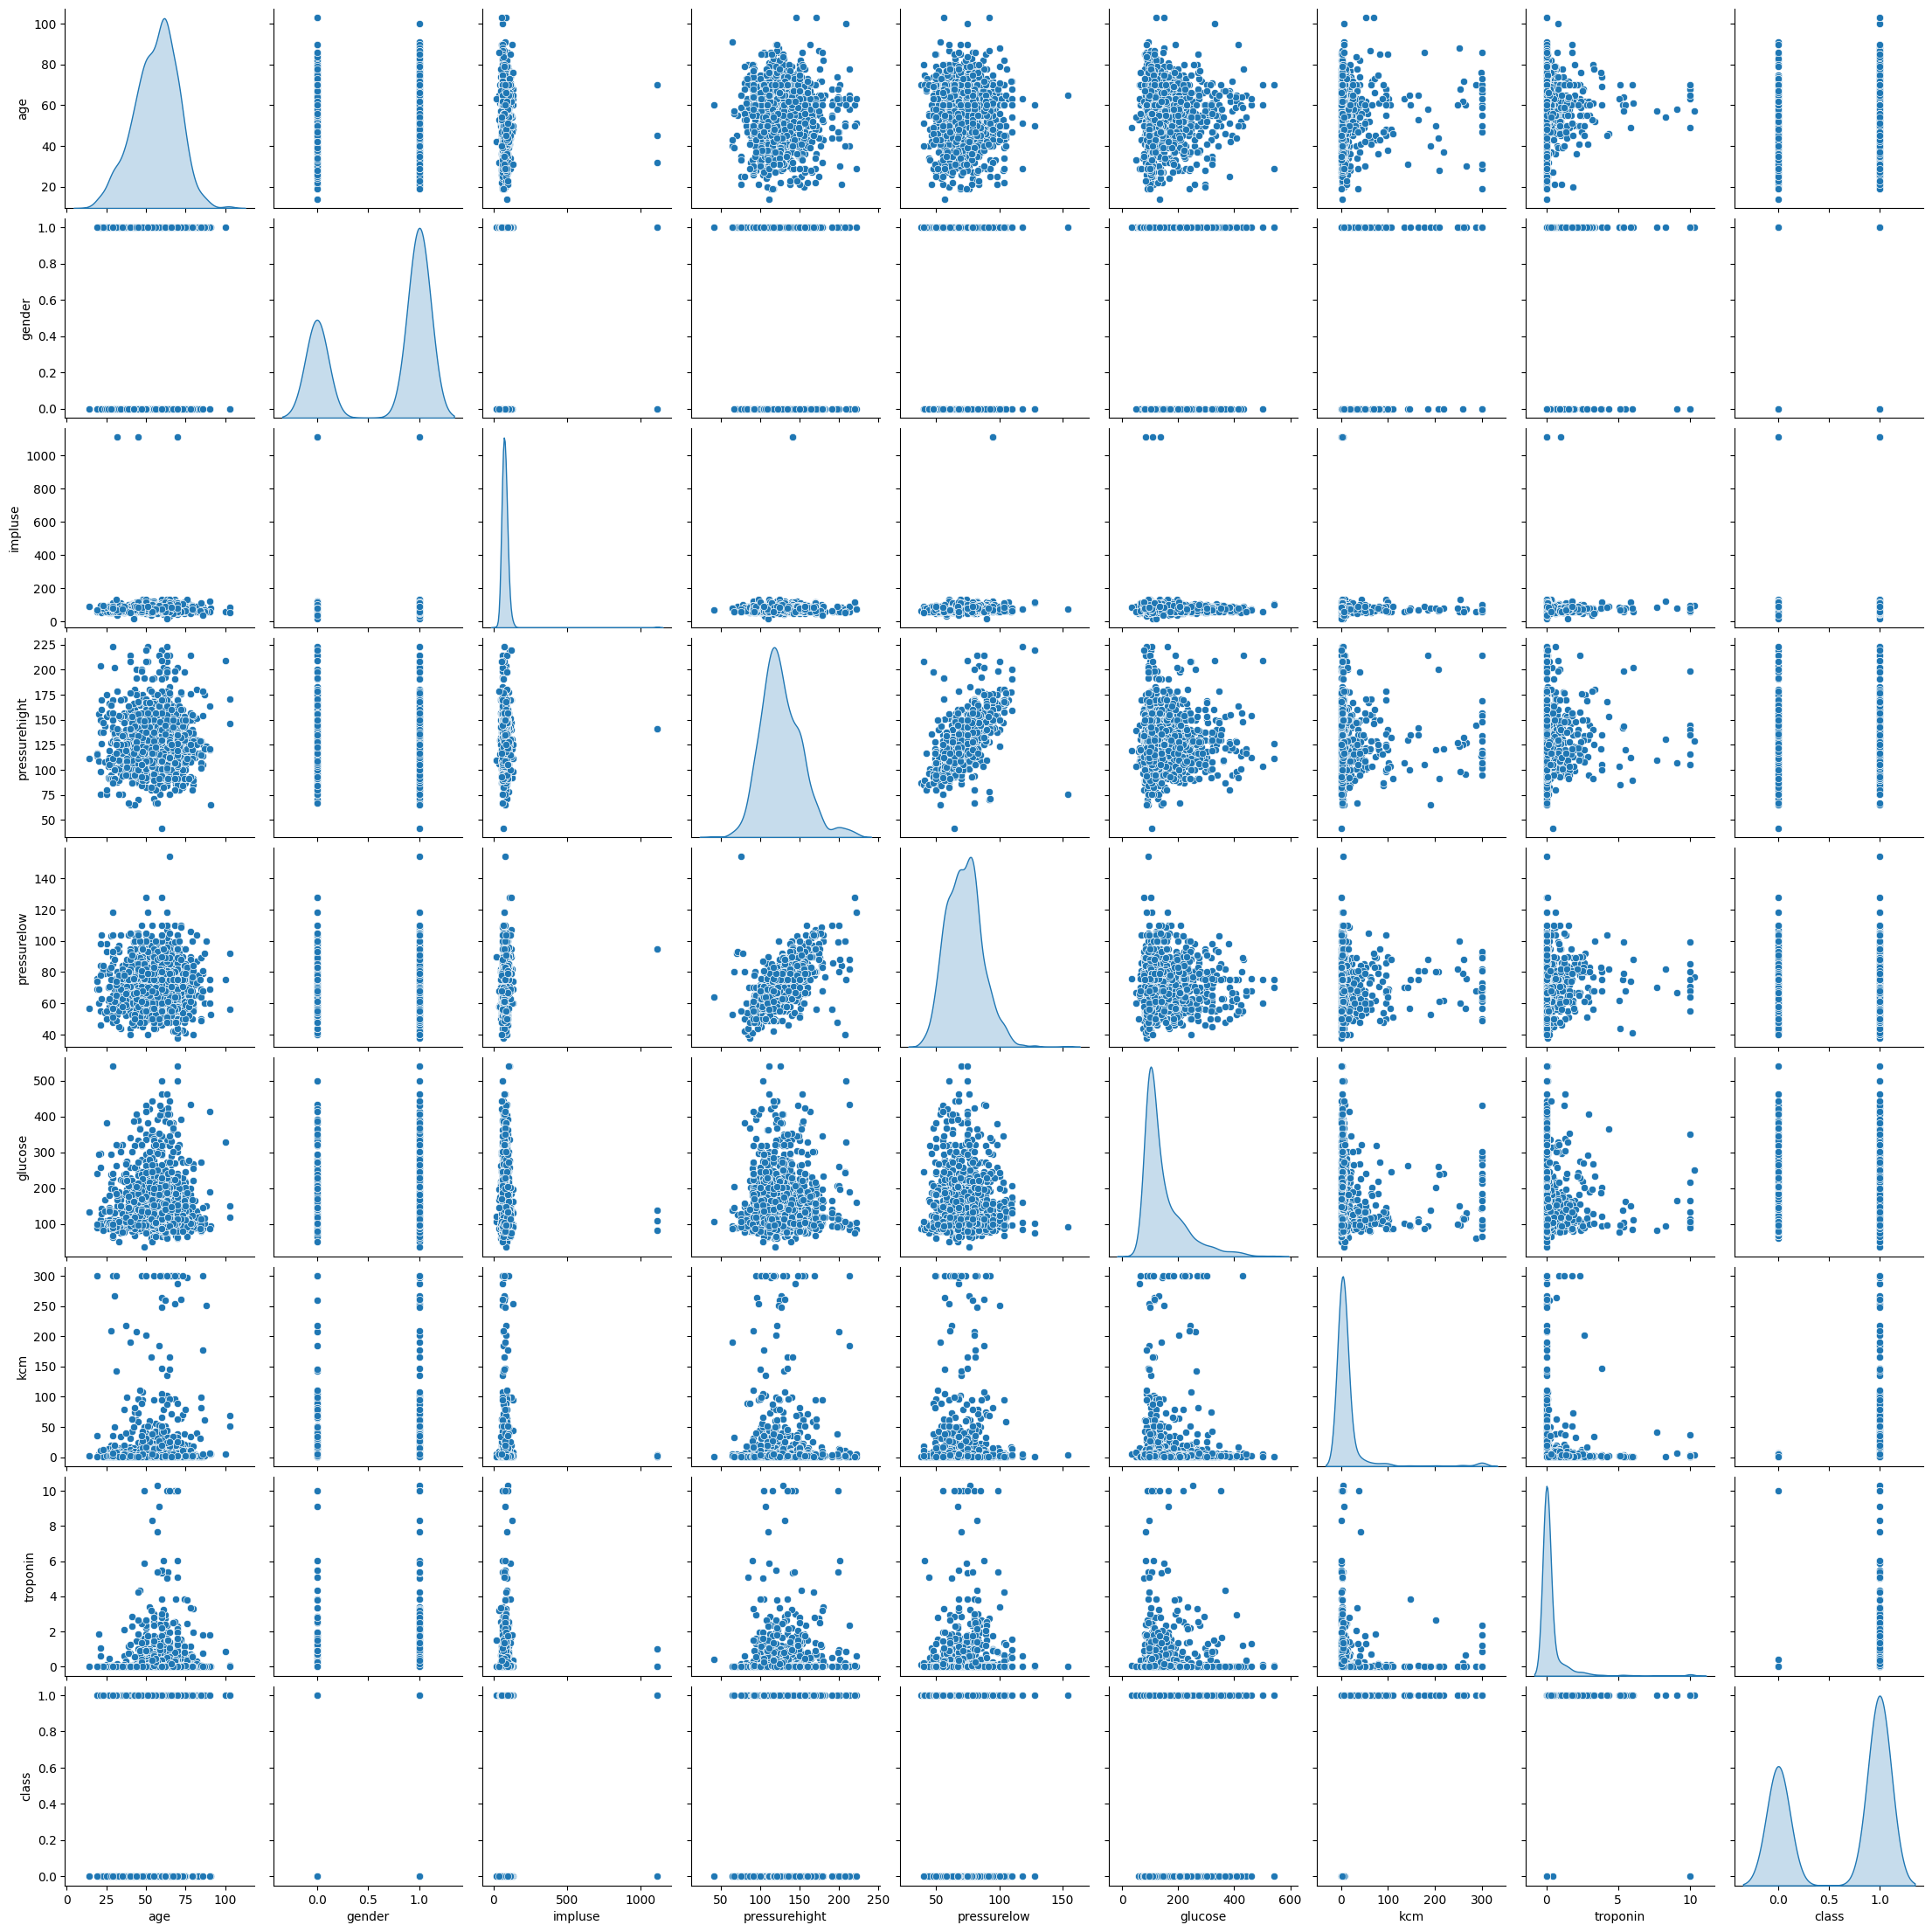

In [ ]:
sns.pairplot(df , diag_kind='kde')

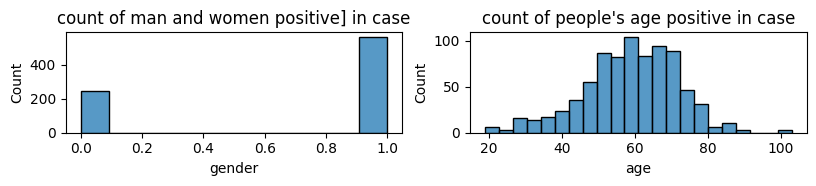

In [ ]:
plt.figure(figsize = (20,6) )
plt.subplot(4,4,1)
sns.histplot(df[df['class'] == 1]['gender'])
plt.title('count of man and women positive] in case')
plt.subplot(4,4,2)
sns.histplot(df[df['class'] == 1]['age'])
plt.title("count of people's age positive in case")
plt.show()

• basically we can say from figure that probebally the man are more having the heart attack than of women  

• another is person with higher age ( age > 50 ) are more chances of having Heart - Attack

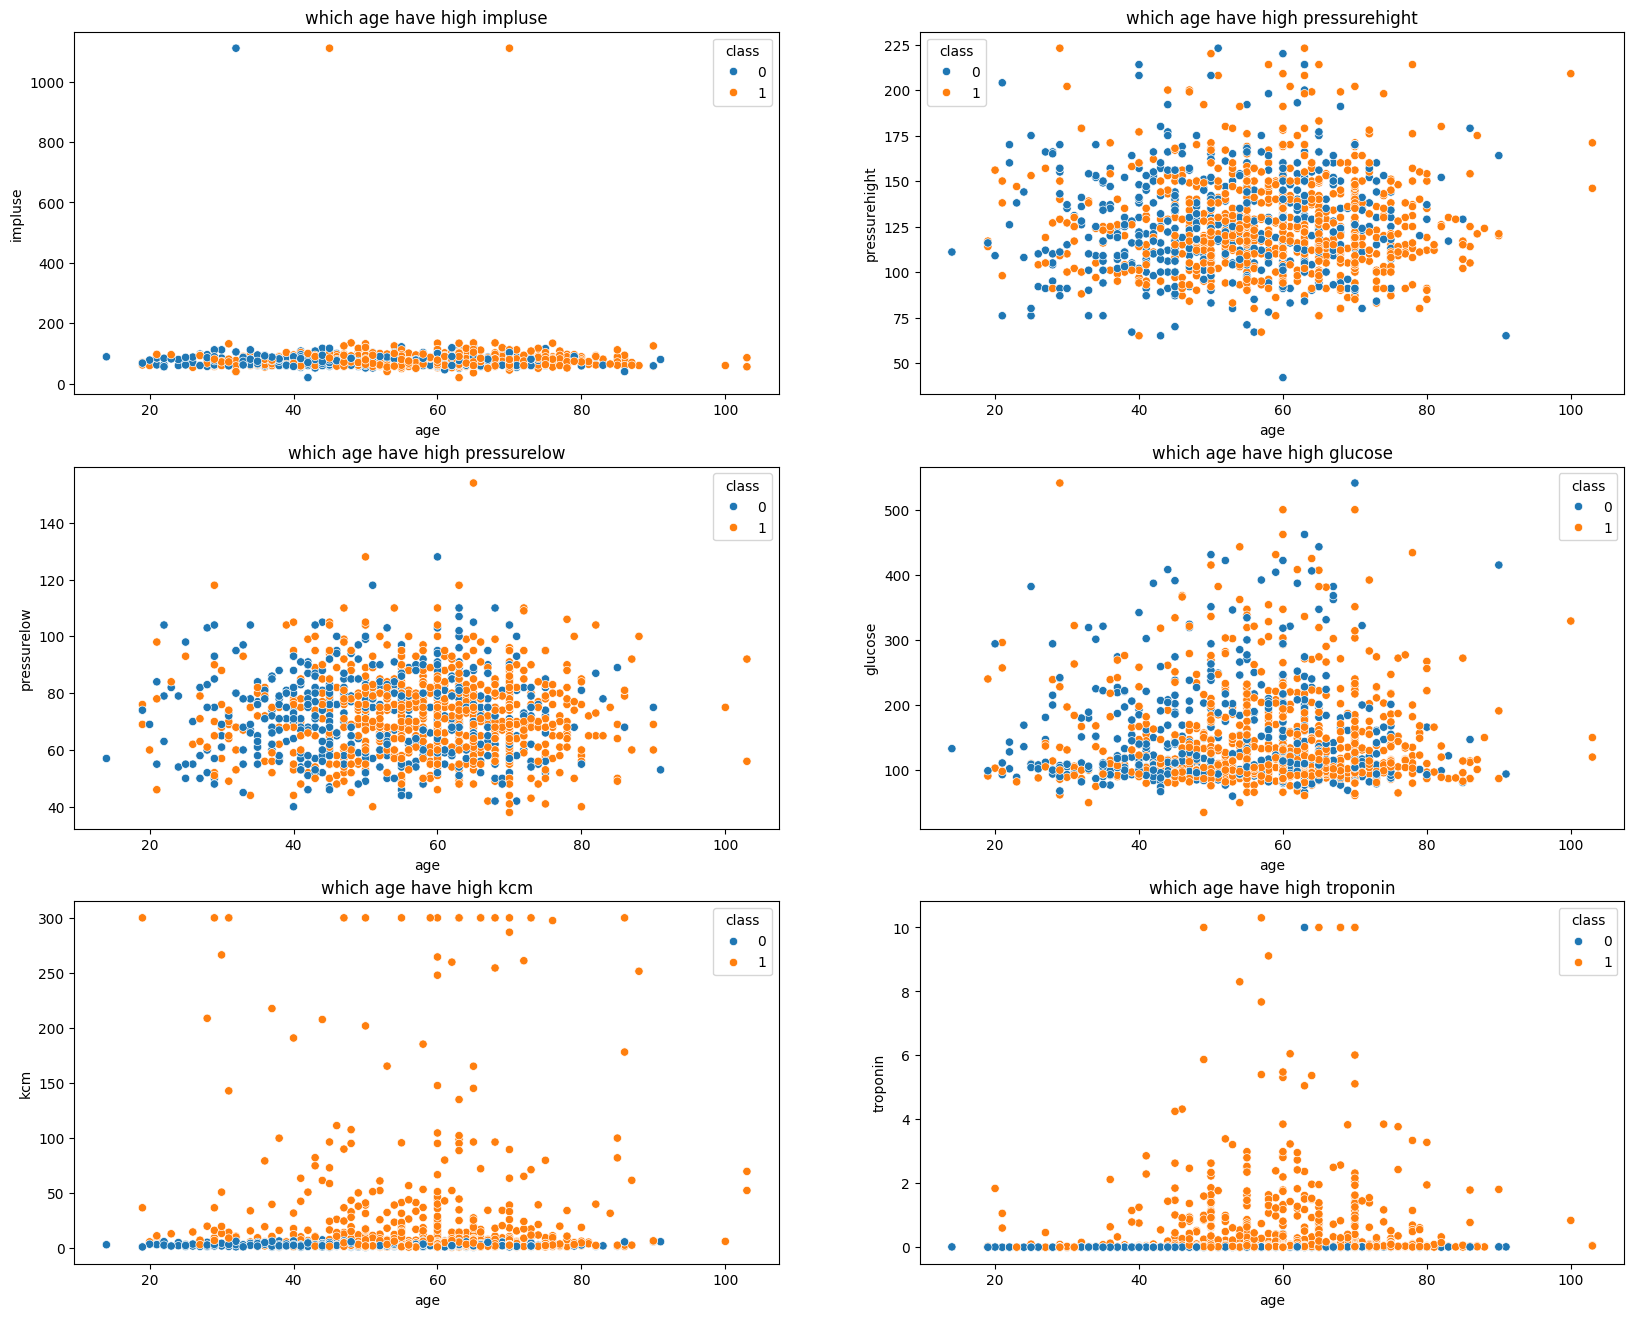

In [ ]:

plt.figure(figsize =(20,16))
plt.subplot(3,2,1)
sns.scatterplot(x = 'age' , y ='impluse' , hue = 'class' , data = df)
plt.title('which age have high impluse')

plt.subplot(3,2,2)
sns.scatterplot(x = 'age' , y ='pressurehight' , hue = 'class' , data = df)
plt.title('which age have high pressurehight')

plt.subplot(3,2,3)
sns.scatterplot(x = 'age' , y ='pressurelow' , hue = 'class' , data = df)
plt.title('which age have high pressurelow')

plt.subplot(3,2,4)
sns.scatterplot(x = 'age' , y ='glucose' , hue = 'class' , data = df)
plt.title('which age have high glucose')

plt.subplot(3,2,5)
sns.scatterplot(x = 'age' , y ='kcm' , hue = 'class' , data = df)
plt.title('which age have high kcm')

plt.subplot(3,2,6)
sns.scatterplot(x = 'age' , y ='troponin' , hue = 'class' , data = df)
plt.title('which age have high troponin')

plt.show()

• so from this above figure we can say that with the high kcm and  age above 50 has higher chances of hear attack

• similarly person having higher troponin and age above 50 also has higher  chances of the hear attack

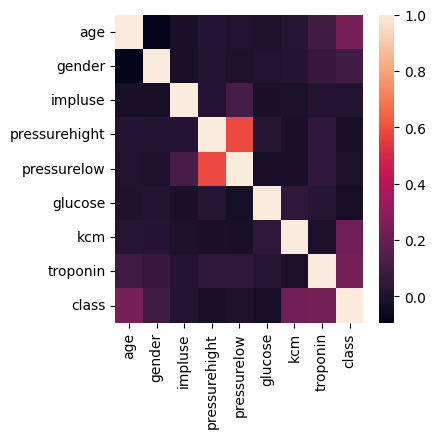

In [ ]:
plt.figure(figsize =(4,4))
sns.heatmap(df.corr())
plt.show()

<Figure size 400x400 with 0 Axes>

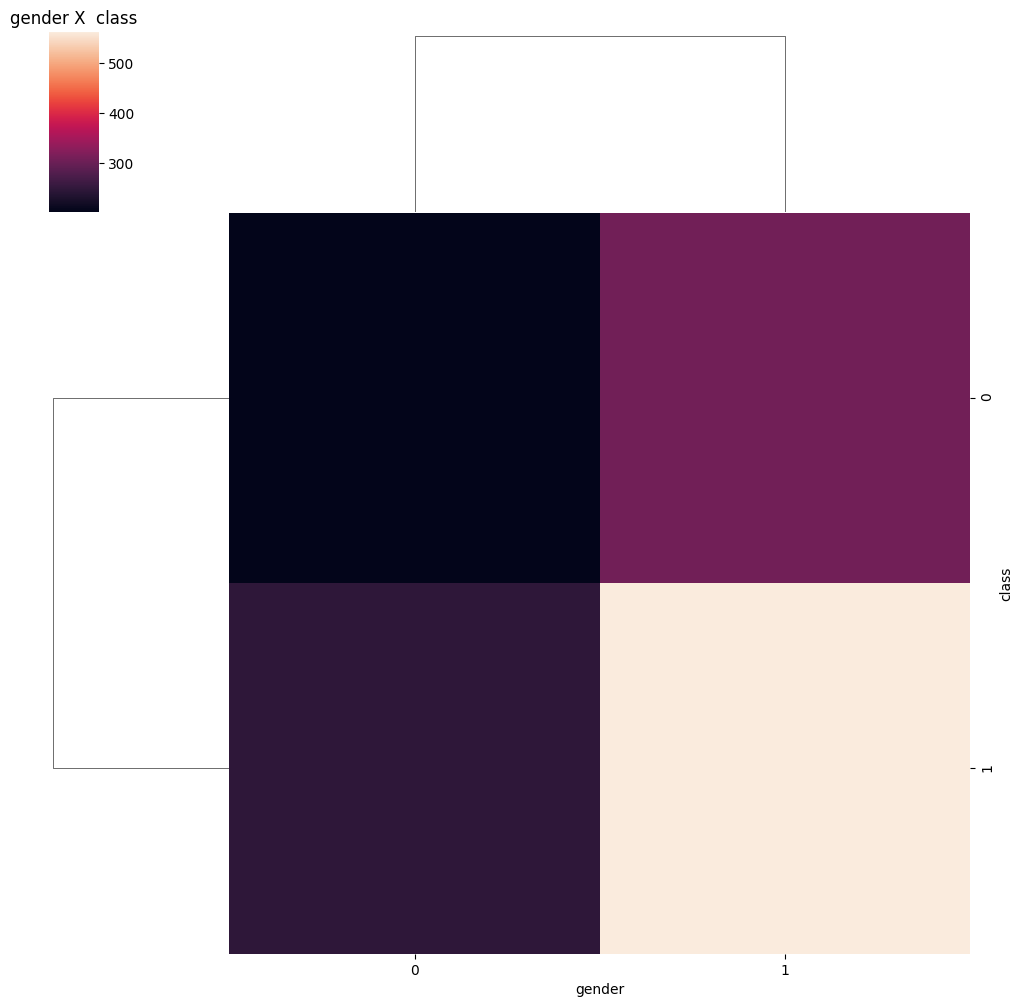

In [ ]:
plt.figure(figsize =(4,4) )
sns.clustermap(pd.crosstab(df['class'] , df['gender']) )
plt.title('gender X  class' )

plt.show()

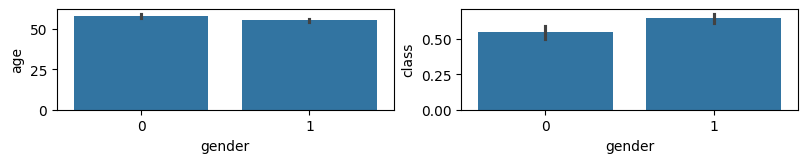

In [ ]:
plt.figure(figsize= (20,6))
plt.subplot(4,4,1)
sns.barplot(x = 'gender' , y= 'age' , data = df)
plt.subplot(4,4,2)
sns.barplot(x ='gender' ,y = 'class' , data = df)
plt.show()

# data creation :

In [ ]:
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


In [ ]:
# define the dependent and independent variable :
X = df.iloc[: , :-1]
y = df.iloc[: ,-1]
X.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,64,1,66,160,83,160.0,1.80,0.012
1,21,1,94,98,46,296.0,6.75,1.060
2,55,1,64,160,77,270.0,1.99,0.003
3,64,1,70,120,55,270.0,13.87,0.122
4,55,1,64,112,65,300.0,1.08,0.003


In [ ]:
# perform train_test_split :

from sklearn.model_selection import train_test_split

X_train , X_test ,y_train ,y_test = train_test_split(
        X ,y , test_size = 0.2 , random_state = 42
)

In [ ]:
# normalize the data :

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()

X_train = scaler.fit_transform(X_train )
X_test = scaler.transform(X_test)

X_train.shape , X_test.shape ,y_train.shape , y_test.shape

((1055, 8), (264, 8), (1055,), (264,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [ ]:
#define callback :

early_stop = EarlyStopping( monitor = 'val_accuracy' ,
                          patience = 9 ,
                           verbose = True
)

In [ ]:
#. build model :

model = Sequential ()
model.add(Dense(8 , activation = 'relu' , kernel_initializer = 'HeNormal'))
model.add(Dropout(0.25))
model.add(Dense (32 , activation = 'relu' , kernel_initializer = 'HeNormal'))
model.add(Dropout(0.3))
model.add(Dense (64 , activation = 'relu' , kernel_initializer = 'HeNormal'))
model.add(Dropout(0.2))
model.add(Dense(2, activation = 'softmax' , kernel_initializer = 'HeNormal'))
model.build(input_shape = X_train.shape)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1055, 8)                 72        
                                                                 
 dropout (Dropout)           (1055, 8)                 0         
                                                                 
 dense_1 (Dense)             (1055, 32)                288       
                                                                 
 dropout_1 (Dropout)         (1055, 32)                0         
                                                                 
 dense_2 (Dense)             (1055, 64)                2112      
                                                                 
 dropout_2 (Dropout)         (1055, 64)                0         
                                                                 
 dense_3 (Dense)             (1055, 2)                 1

In [ ]:
from tensorflow.keras.optimizers.schedules import PolynomialDecay
from tensorflow.keras.optimizers import Adam

epochs = 100
num_train_steps =  epochs * len(X_train)

lr_sdlr = PolynomialDecay( initial_learning_rate = 2e-5 , end_learning_rate = 0 ,decay_steps = num_train_steps)

optimizer = Adam(lr_sdlr)

In [ ]:
model.compile( 'adam' ,
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

history = model.fit(X_train ,y_train ,
                   epochs = 300 , batch_size = 64 ,
                   validation_data = (X_test,y_test) ,
                   verbose = True)

Epoch 1/300
17/17 [==============================] - 3s 18ms/step - loss: 1.1383 - accuracy: 0.5336 - val_loss: 0.7398 - val_accuracy: 0.5530
Epoch 2/300
17/17 [==============================] - 0s 5ms/step - loss: 0.9553 - accuracy: 0.5384 - val_loss: 0.6710 - val_accuracy: 0.6439
Epoch 3/300
17/17 [==============================] - 0s 5ms/step - loss: 0.8876 - accuracy: 0.5640 - val_loss: 0.6607 - val_accuracy: 0.6667
Epoch 4/300
17/17 [==============================] - 0s 5ms/step - loss: 0.8362 - accuracy: 0.5848 - val_loss: 0.6489 - val_accuracy: 0.6667
Epoch 5/300
17/17 [==============================] - 0s 5ms/step - loss: 0.7987 - accuracy: 0.5573 - val_loss: 0.6368 - val_accuracy: 0.6705
Epoch 6/300
17/17 [==============================] - 0s 5ms/step - loss: 0.7563 - accuracy: 0.5754 - val_loss: 0.6361 - val_accuracy: 0.6742
Epoch 7/300
17/17 [==============================] - 0s 6ms/step - loss: 0.7501 - accuracy: 0.5848 - val_loss: 0.6277 - val_accuracy: 0.6705
Epoch 8/300


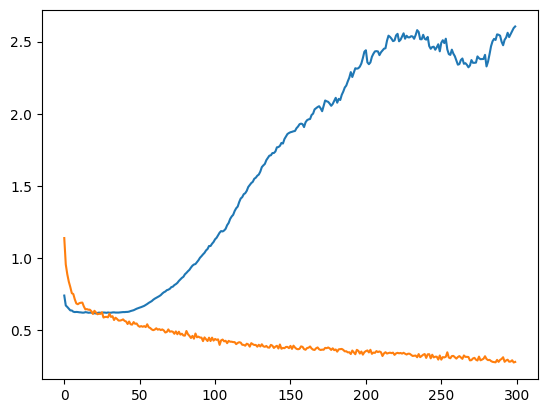

In [ ]:
plt.plot(history.history['val_loss'],label = 'test')
plt.plot(history.history['loss'] , label = 'train')
plt.show()

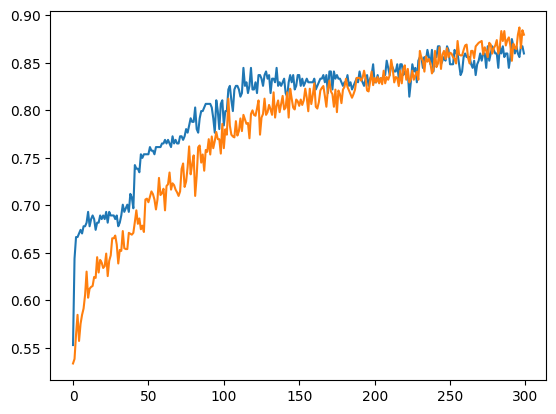

In [ ]:
plt.plot(history.history['val_accuracy'],label = 'test')
plt.plot(history.history['accuracy'] , label = 'train')
plt.show()


In [ ]:
loss, acc  = model.evaluate(X_train,y_train)
loss, acc

33/33 [==============================] - 0s 2ms/step - loss: 0.2339 - accuracy: 0.9081


(0.2339451014995575, 0.9080568552017212)

In [ ]:
y_pred = model.predict( X_test)

9/9 [==============================] - 0s 2ms/step


In [ ]:
y_pred =[np.argmax(y) for y in y_pred]
print(y_pred)

[1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test , y_pred)

array([[ 78,  23],
       [ 14, 149]])

<Axes: >

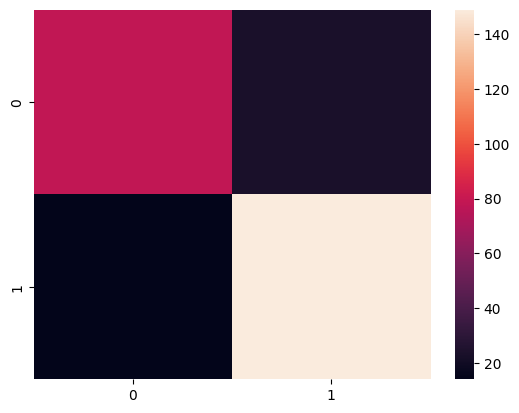

In [ ]:
sns.heatmap(confusion_matrix(y_test , y_pred))

In [ ]:
model.save('Heart_Attack_predictor.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
